# Task L9

**Description**: Neural networks. Use load_breast_cancer and classify with MLP. Use the signs data set and classify with MLP

In [15]:
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

### 1. Load the dataset

In [ ]:
def load_dataset():
    path = '.'
    fn = os.path.join(path, 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:])  # features
    y_train = np.array(train_dataset["train_set_y"][:])  # labels

    fn = os.path.join(path, 'test_signs.h5')
    test_dataset = h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:])
    y_test = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])

    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))

    return X_train, y_train, X_test, y_test, classes

### 2. Load dataset

In [21]:
X, y = load_breast_cancer(return_X_y=True)

### 3. Divide into train and test sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Standardize the data

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5. Create and train the model

In [24]:
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Results
print("train accuracy= {:.3%}".format(clf.score(X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test_scaled, y_test)))

train accuracy= 100.000%
test accuracy= 97.368%


### 6. Load dataset

In [25]:
X_train, y_train, X_test, y_test, classes = load_dataset()

### 7. Preparation: Deployment is depicted in vector

In [26]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

### 8. Standardize the data

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

### 9. Converting target variables to a vector

In [28]:
y_train = y_train.ravel()
y_test = y_test.ravel()

### 10. MLP

In [29]:
clf = MLPClassifier(hidden_layer_sizes=(128,), max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Results
print("train accuracy= {:.3%}".format(clf.score(X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test_scaled, y_test)))


train accuracy= 100.000%
test accuracy= 90.000%


### 11. Grid visualization

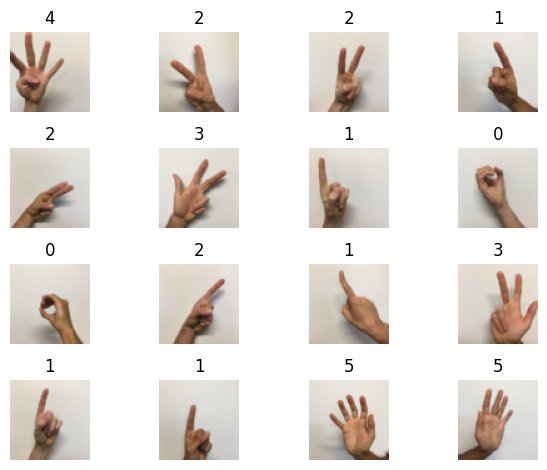

In [33]:
def display_samples_in_grid(X, n_rows, n_cols=None, y=None):
    if n_cols is None:
        n_cols = n_rows
    indices = np.random.randint(0, len(X), n_rows * n_cols)
    for i in range(n_rows):
        for j in range(n_cols):
            index = n_rows * i + j
            ax = plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X[indices[index]])
            if y is not None:
                plt.title(str(y[indices[index]]))
            plt.axis('off')
    plt.tight_layout(h_pad=1)

plt.figure()
predicted = clf.predict(X_test_scaled)
display_samples_in_grid(X_test, n_rows=4, y=predicted)
plt.gcf().canvas.manager.set_window_title('MLP Prediction - Test set')
